<a href="https://colab.research.google.com/github/maskot1977/Python2020/blob/1218/96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!date

Mon Dec 21 01:39:19 UTC 2020


In [48]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd

In [49]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 

In [50]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [52]:
url = "https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/wine.txt"
urllib.request.urlretrieve(url, 'wine.txt') 

('wine.txt', <http.client.HTTPMessage at 0x7fcdf51821d0>)

In [53]:
df = pd.read_csv("wine.txt", sep="\t", index_col=0)

In [54]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [55]:
# 行列の標準化
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [57]:
dfs = dfs[['Alcohol', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue']]
dfs

,Alcohol,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue
0,1.514341,1.031908,-0.657708,1.221438,0.251009,0.361158
1,0.245597,0.731565,-0.818411,-0.543189,-0.292496,0.404908
2,0.196325,1.212114,-0.497005,2.129959,0.268263,0.317409
3,1.686791,1.462399,-0.979113,1.029251,1.182732,-0.426341
4,0.294868,0.661485,0.226158,0.400275,-0.318377,0.361158
...,...,...,...,...,...,...
173,0.873810,-1.420891,1.270726,-0.927563,1.139596,-1.388840
174,0.491955,-1.280731,0.547563,-0.316058,0.967055,-1.126341
175,0.331822,-1.340800,0.547563,-0.420888,2.217979,-1.607590
176,0.208643,-1.350811,1.351077,-0.228701,1.829761,-1.563840


In [58]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

In [59]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.626512,1.564780,0.335359,-0.040434,-0.456941,-0.242943
1,-0.795680,-0.017896,-0.311487,-0.930442,0.028007,0.461414
2,-1.969241,0.924445,0.096473,1.302281,0.021566,-0.161248
3,-1.331358,2.563761,-0.196335,0.045721,-0.204637,0.393221
4,-0.727382,0.045104,0.539943,0.109119,-0.303482,0.202513


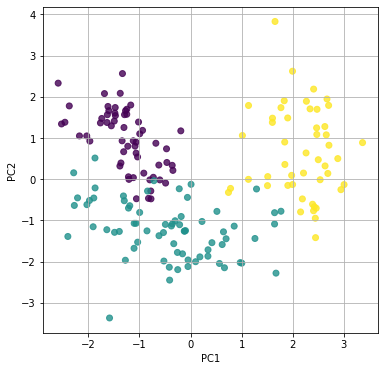

In [60]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

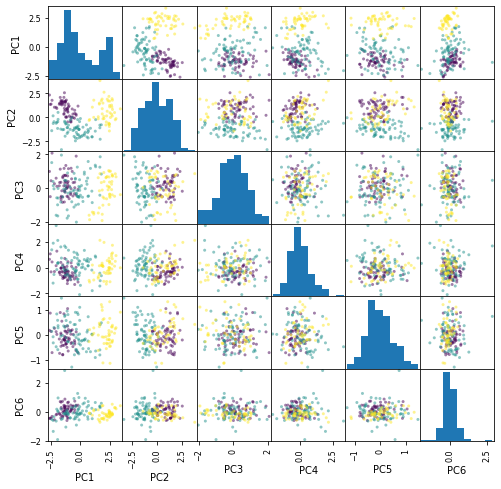

In [61]:
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]), 
                        figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5) 
plt.show()

In [62]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.413724
PC2,0.283546
PC3,0.111437
PC4,0.108522
PC5,0.043981
PC6,0.038789


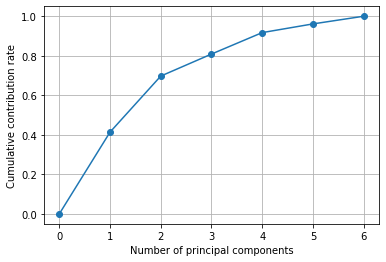

In [63]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [64]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,2.482344
PC2,1.701274
PC3,0.668625
PC4,0.651133
PC5,0.263888
PC6,0.232736


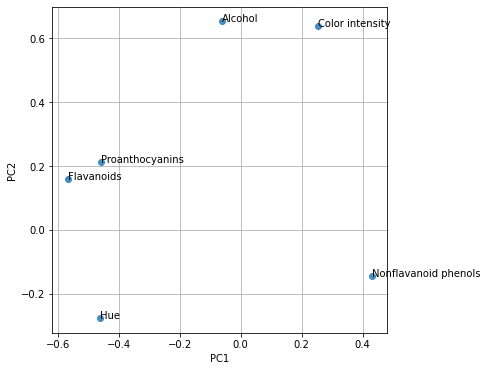

In [65]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], ['Alcohol', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue']):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [66]:
url = "https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/sake_dataJ.txt"
urllib.request.urlretrieve(url, 'sake_dataJ.txt') 
df2 = pd.read_csv("sake_dataJ.txt", sep="\t", index_col=0)
df2.head()

,Sake,Shochu,Bear,Wine,Whisky
Pref,,,,,
Hokkaido,46476000,50642000,315300000,10488000,9749000
Aomori,17273000,11503000,83164000,1774000,3122000
Iwate,17120000,10220000,67803000,1458000,1870000
Miyagi,27859000,11768000,109850000,2824000,5049000
Akita,24153000,6240000,67894000,1242000,2099000


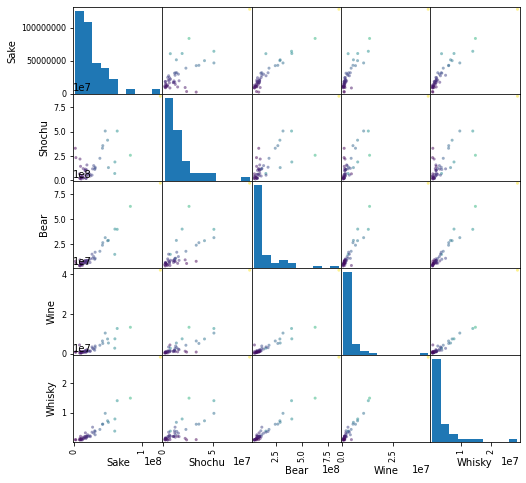

In [67]:
from pandas import plotting 
plotting.scatter_matrix(df2.iloc[:, :], figsize=(8, 8), c=list(df2.iloc[:, 0]), alpha=0.5)
plt.show()

In [68]:
# 行列の標準化
dfs2 = df2.iloc[:, :].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs2.head()

,Sake,Shochu,Bear,Wine,Whisky
Pref,,,,,
Hokkaido,0.811237,2.147580,1.057634,1.029017,1.207049
Aomori,-0.437580,-0.210625,-0.389028,-0.298893,-0.126779
Iwate,-0.444123,-0.287929,-0.484757,-0.347047,-0.378772
Miyagi,0.015112,-0.194659,-0.222722,-0.138885,0.261072
Akita,-0.143369,-0.527732,-0.484190,-0.379963,-0.332681


In [70]:
#主成分分析の実行
pca2 = PCA()
pca2.fit(dfs2)
# データを主成分空間に写像
feature = pca2.transform(dfs2)

In [71]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs2.columns))]).head()

,PC1,PC2,PC3,PC4,PC5
0,2.763012,1.080493,-0.307851,-0.004797,0.090224
1,-0.654090,0.127975,0.091622,-0.042810,0.195329
2,-0.871742,0.110142,0.062106,0.042268,0.036579
3,-0.117750,-0.147360,0.053725,0.088175,0.359070
4,-0.831063,-0.242801,0.002924,0.185429,0.067324


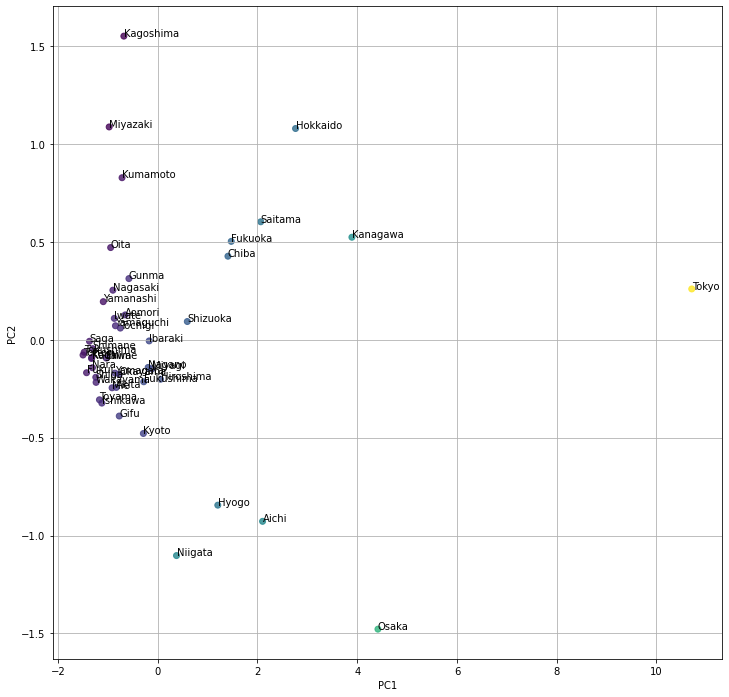

In [81]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(12, 12))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df2.iloc[:, 0]))
for x, y, name in zip(feature[:, 0], feature[:, 1], df2.index[:]):
    plt.text(x, y, name)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

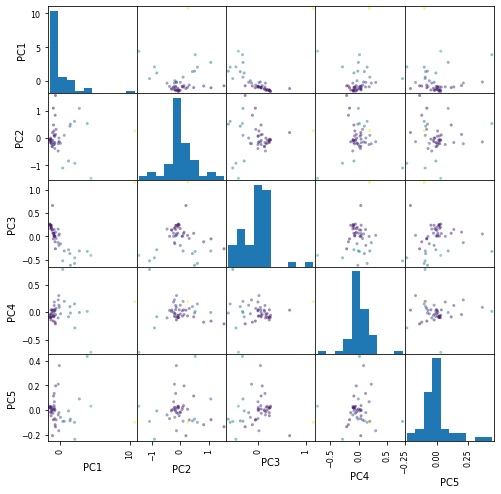

In [73]:
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs2.columns))]), 
                        figsize=(8, 8), c=list(df2.iloc[:, 0]), alpha=0.5) 
plt.show()

In [74]:
# 寄与率
pd.DataFrame(pca2.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs2.columns))])

,0
PC1,0.911486
PC2,0.058173
PC3,0.019491
PC4,0.007828
PC5,0.003022


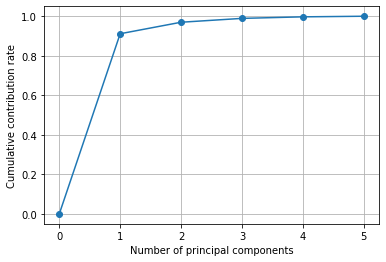

In [75]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca2.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [76]:
# PCA の固有値
pd.DataFrame(pca2.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs2.columns))])

,0
PC1,4.557428
PC2,0.290866
PC3,0.097456
PC4,0.039141
PC5,0.015110


In [77]:
# PCA の固有ベクトル
pd.DataFrame(pca2.components_, columns=df2.columns[:], index=["PC{}".format(x + 1) for x in range(len(dfs2.columns))])

,Sake,Shochu,Bear,Wine,Whisky
PC1,0.444046,0.415421,0.457535,0.453074,0.464365
PC2,-0.489969,0.832279,-0.237431,0.050400,-0.091263
PC3,-0.409678,-0.341454,-0.252813,0.787363,0.178094
PC4,0.619715,0.127159,-0.741206,0.172183,-0.144047
PC5,-0.104259,-0.044465,-0.347832,-0.377620,0.850629


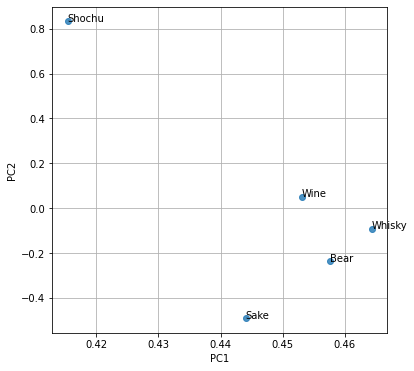

In [78]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca2.components_[0], pca2.components_[1], df2.columns[:]):
    plt.text(x, y, name)
plt.scatter(pca2.components_[0], pca2.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()